# PROJECT 02: PHÂN TÍCH DỮ LIỆU
- Lê Minh Hữu - 19120525
- Ninh Duy Huy - 19120533
- Cao Thanh Khiết - 19120544
- Nguyễn Tuấn Khoa - 19120547
- Trần Tuấn Kiệt - 19120557


## TIỀN XỬ LÝ DỮ LIỆU

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
playlists_df = pd.read_csv("data/playlists.csv", sep=",")
tracks_df = pd.read_csv("data/tracks.csv", sep=",")
users_df = pd.read_csv("data/users.csv", sep=",")

# configure matplotlib
plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
print(playlists_df.shape)
print(tracks_df.shape)
print(users_df.shape)

(608, 3)
(6979, 45)
(422, 33)


In [4]:
# delete some row with missing values more than the given ratio
def preprocess_data(old_df, ratio):
    attributes = list(old_df.columns)
    row = len(old_df.index)
    col = len(attributes)

    a = []
    arr=[]
    for i in range(row):
        for j in range(col):
            a.append(old_df[attributes[j]][i])
        arr.append(a)
        a = []

    result_arr = []
    temp_a = []
    for i in range(row):
        for j in range(col):
            temp_a.append(arr[i][j])
        result_arr.append(temp_a)
        temp_a = []
# xóa dòng
    for value in arr:
        count_missing = 0
        for i in value:
            if i == 'None' or i!=i :
                count_missing +=1
        if (count_missing / col) > ratio:
            result_arr.remove(value)
# xóa cột
    new_row = len(result_arr)
    temp_arr = []
    temp_a = []
    for i in range(new_row):
        for j in range(col):
            temp_a.append(result_arr[i][j])
        temp_arr.append(temp_a)
        temp_a = []

    count_del_col = 0 #biến đếm các cột đã bị xóa
    for i in range(col):
        count_missing = 0
        for j in range(new_row):
            if temp_arr[j][i] != temp_arr[j][i] or temp_arr[j][i] == 'None':
                count_missing += 1
        if (count_missing /new_row) > ratio:
            del attributes[i-count_del_col]
            for r in result_arr:
                del r[i-count_del_col]
            count_del_col += 1

    # tạo một DataFrame mới để lưu kết quả
    new_data = {}
    new_row = len(result_arr)
    for i in range(len(attributes)):
        new_data[attributes[i]] = [result_arr[j][i] for j in range(new_row)] 

    new_df = pd.DataFrame(new_data, columns = attributes)
    return new_df


In [5]:
playlists_new = preprocess_data(playlists_df,0.5)
tracks_new = preprocess_data(tracks_df,0.5)
users_new = preprocess_data(users_df,0.5)

In [6]:
# ghi dataframe ra file mới
playlists_new.to_csv('playlists_new.csv', index = False, header = True)
tracks_new.to_csv('tracks_new.csv', index = False, header = True)
users_new.to_csv('users_new.csv', index = False, header = True)

In [7]:
print(playlists_new.shape)
print(tracks_new.shape)
print(users_new.shape)

(608, 3)
(3485, 38)
(216, 32)


### Câu 1: top 100 các tracks được download nhiều nhất vẽ biểu đồ histogram để thể hiện các tracks có số lượng download ở khoảng bao nhiêu chiếm đa số
   - Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
        - Các số liệu đã được xác định
        - Ứng dụng câu hỏi là tìm ra các tracks được ưa chuộng nhất
        - Câu hỏi có thể trả lời với dữ liệu có sẵn

In [8]:
My_tracks = tracks_new

Ta cần tiền xử lý một vài dữ liệu bất hợp lý
- Bỏ đi những dòng có dữ liệu bất hợp lý đó là những dòng có downloadable là False nhưng dòng download_count vẫn có giá trị khác 0.0
- Loại bỏ đi những dòng có giá trị là 0.0 hay NaN trong cột download_count
- Loại bỏ đi những dòng trùng nhau và giữ lại dòng xuất hiện đầu tiên

In [9]:
My_tracks = My_tracks[My_tracks['downloadable'] == True]
My_tracks = My_tracks[My_tracks['download_count'].isna() == False]
My_tracks = My_tracks[My_tracks['download_count'] != 0.0]

Tiếp theo ta sẽ sắp xếp lại theo thứ tự giảm dần rồi chọn 100 dòng đầu tiên

In [10]:
My_df = My_tracks[['download_count', 'title']]
My_df = My_df.drop_duplicates(subset=['download_count', 'title'], keep='first')
My_df = My_df.sort_values(by='download_count', ascending=False)
My_df = My_df.head(100)
My_df

,download_count,title
715,94327.0,Better Days
2585,63685.0,ODESZA - My Friends Never Die
860,45030.0,The Process
844,28523.0,Good Morning
771,19074.0,Summertime Love
...,...,...
815,212.0,Pieza 7: Jueces
720,198.0,The Way - Instrumental Music Oud / موسيقى عود
855,189.0,Pieza 40: Mateo
813,176.0,Pieza 23: Isaías


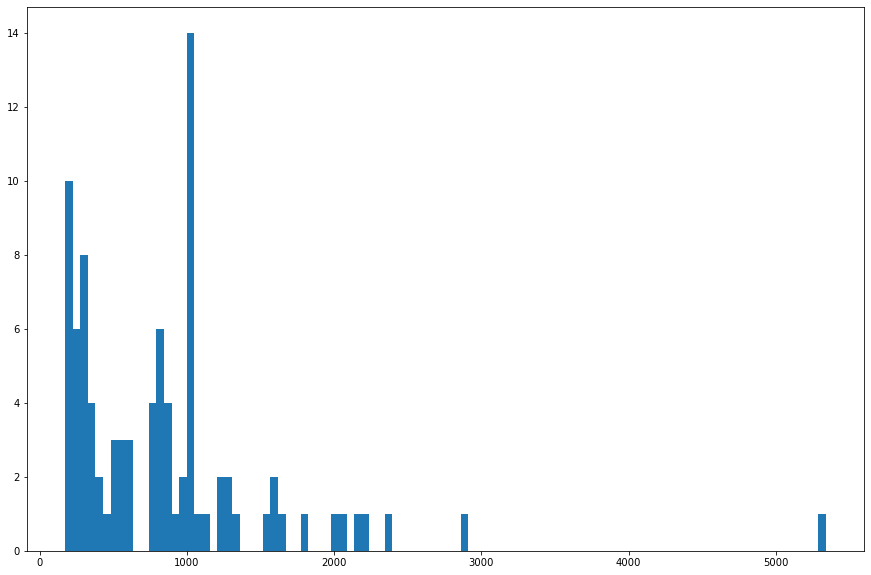

In [11]:
My_df = My_df[My_df['download_count'] <= 6000]
plt.hist(My_df['download_count'], bins=100)
plt.show()

Ta cần lọc đi một số outlier để biểu đồ được rõ ràng hơn các outlier là những giá trị lớn hơn 6000
- Nhận xét: 
    - Histogram thuộc dạng phân bố lệch trái
    - Số lượng download các tracks dao động trong khoảng 0 đến 1000 chiếm đa số

### Câu 2:  top 100 users có followers cao nhất và vẽ biểu đồ histogram để thể hiện các users có số lượng followers ở khoảng bao nhiêu chiếm đa số
   - Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
        - Các số liệu đã được xác định
        - Ứng dụng câu hỏi là tìm ra users nổi tiếng và có nhiều sản phẩm âm nhạc được ưa thích
        - Câu hỏi có thể trả lời với dữ liệu có sẵn

In [12]:
My_users = users_new

Ta cần tiền xử lý một số dữ liệu bất hợp lý
- Loại bỏ các dòng trùng nhau và giữ lại dòng xuất hiện đầu tiên

In [13]:
My_users = My_users[['followers_count', 'username']]
My_users = My_users.drop_duplicates(subset=['followers_count', 'username'], keep='first')

Tiếp theo ta sẽ sắp xếp lại theo thứ tự giảm dần rồi chọn 100 dòng đầu tiên

In [14]:
My_users = My_users.sort_values(by='followers_count', ascending=False)
My_users = My_users.head(100)
My_users

,followers_count,username
113,6498535.0,Skrillex
110,3649072.0,Seven Lions
205,3467276.0,Damian Marley
189,2785568.0,dubmatix
190,2768063.0,VP RECORDS
...,...,...
215,2349.0,Black Roots
120,2114.0,Tracey Chattaway
48,2011.0,Copeland Network
132,1814.0,Francesco Berta


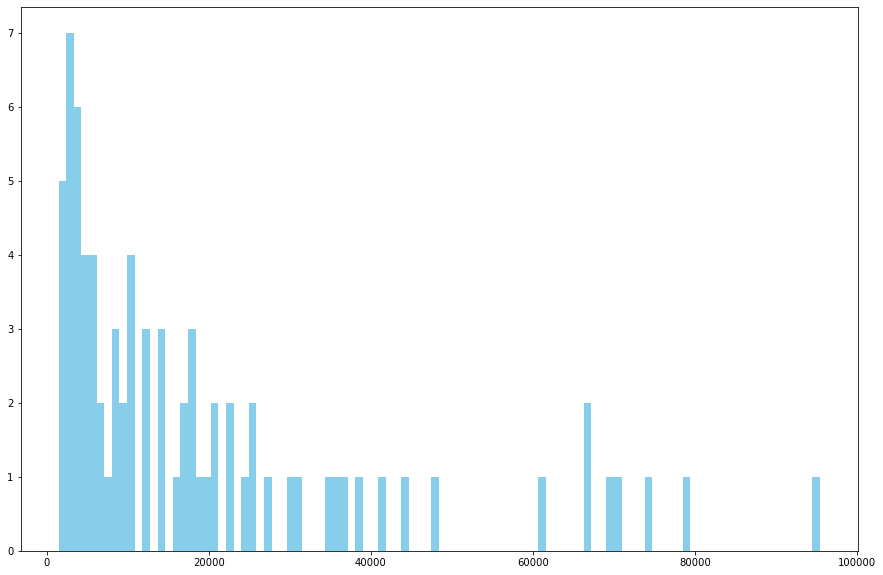

In [15]:
My_users = My_users[My_users['followers_count'] <= 100000]
plt.hist(My_users['followers_count'], bins=100, color = "skyblue")
plt.show()

Ta cần lọc đi một số outlier để biểu đồ được rõ ràng hơn các outlier là những giá trị lớn hơn 100000
- Nhận xét: 
    - Histogram thuộc dạng phân bố lệch trái
    - Số lượng followers các users dao động trong khoảng 0 đến 20000 chiếm đa số

### Câu 3


In [16]:
box_df = tracks_new['likes_count']
box_df = tracks_new[tracks_new['likes_count'].notnull()]
l = box_df['likes_count'].to_list()
print(l)

[344.0, 200.0, 2692.0, 95.0, 87.0, 633.0, 84.0, 397.0, 366.0, 2692.0, 144.0, 344.0, 216.0, 200.0, 512.0, 633.0, 95.0, 512.0, 177.0, 1164.0, 27.0, 239.0, 63.0, 434.0, 1110.0, 26.0, 10.0, 17.0, 38.0, 756.0, 3.0, 500.0, 6.0, 9.0, 8.0, 571.0, 11351.0, 7.0, 186.0, 18.0, 5.0, 5.0, 34.0, 5.0, 989.0, 29.0, 13.0, 88.0, 14.0, 278.0, 55.0, 11639.0, 35.0, 1449.0, 21.0, 986.0, 3328.0, 22.0, 59.0, 5398.0, 8292.0, 4346.0, 615.0, 524.0, 3292.0, 3566.0, 18.0, 159.0, 70.0, 167.0, 9.0, 23.0, 69072.0, 19643.0, 195.0, 868.0, 457.0, 1210.0, 1076.0, 11813.0, 161.0, 1270.0, 10.0, 530.0, 156.0, 7046.0, 4071.0, 1741.0, 6066.0, 39523.0, 20070.0, 2181.0, 1086.0, 145.0, 455.0, 355.0, 2602.0, 151.0, 1086.0, 5479.0, 83.0, 2810.0, 712.0, 163.0, 1086.0, 1091.0, 5479.0, 542.0, 794.0, 165.0, 416.0, 1154.0, 2346.0, 859.0, 261.0, 297.0, 666.0, 403.0, 363676.0, 783.0, 1441.0, 240.0, 1634.0, 5028.0, 1040.0, 5792.0, 301.0, 427.0, 1855.0, 3389.0, 284.0, 358.0, 327.0, 2401.0, 1772.0, 4234.0, 874.0, 325.0, 2179.0, 2021.0, 1514.

{'whiskers': [<matplotlib.lines.Line2D at 0x14b05e654c0>,
 'caps': [<matplotlib.lines.Line2D at 0x14b05e65b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b05e65070>],
 'medians': [<matplotlib.lines.Line2D at 0x14b05e71280>],
 'fliers': [<matplotlib.lines.Line2D at 0x14b05e71610>],
 'means': []}

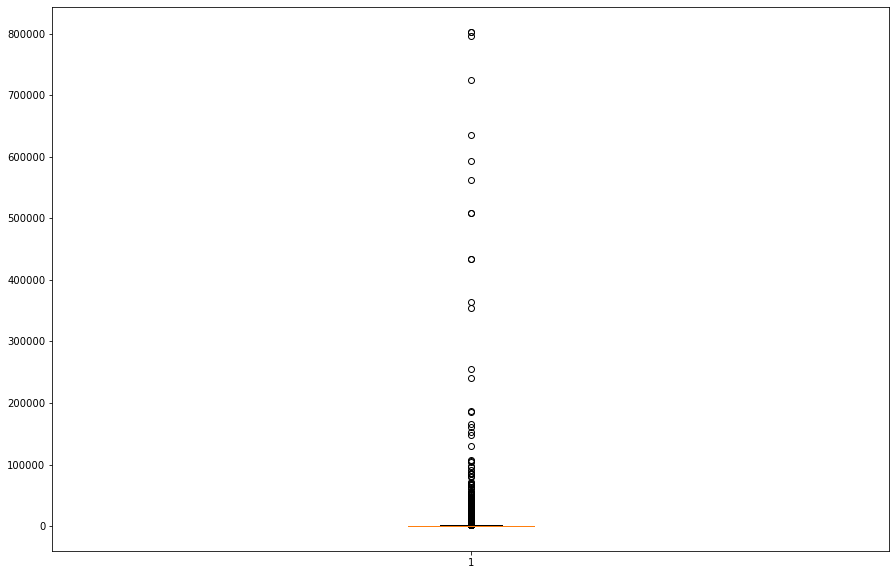

In [17]:
plt.boxplot(x=l)

### Câu hỏi 4: Sự tương quan giữa số lượt like và số lượt repost
Xét dataset **tracks** "**(3485, 38)**" chứa thông tin của từng track với số lượng sample là 3485. Ta sẽ xem xét 2 thuộc tính là:
- **likes_count**: số lượng người thích của track đó
- **reposts_count**: số lượng người đăng lại track đó
<!-- -->
Ta sẽ xem sự tương quan giữa số lượt thích **likes_count** với số lượng đăng lại **reposts_count** bằng Scatter plot để xem nếu một track có số lượt thích cao thì khả năng sẽ được repost lại cũng sẽ cao

In [18]:
cor_data = tracks_new[['likes_count', 'reposts_count']]

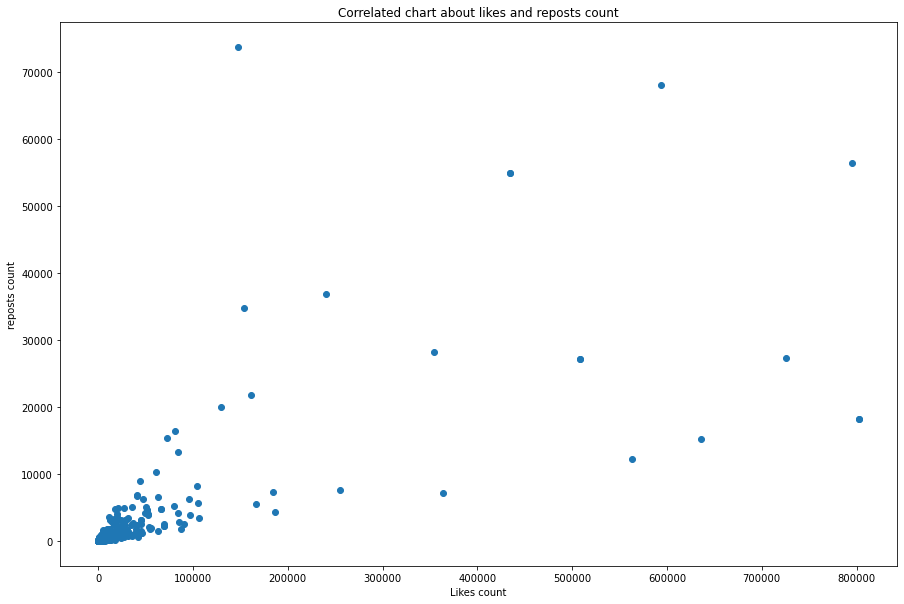

In [19]:
plt.scatter(cor_data['likes_count'], cor_data['reposts_count'], marker='o');
# plt.rcParams["figure.figsize"] = (15, 10)

plt.xlabel('Likes count')
plt.ylabel('reposts count')
plt.title("Correlated chart about likes and reposts count")
plt.show()

### Nhận xét:
- Với phương pháp này, ta có thể nhận thấy các điểm outlier và ta có thể loại trừ chúng
- ta sẽ xem xét kĩ trong khoảng từ 0-1000, bởi vì đây là nơi các điểm tập trung lớn nhất. Ta thấy các điểm có xu hướng theo một đường thẳng xéo đi lên,
vì vậy 2 biến **like_count** và **repost_count** có sự tương quan với nhau theo hướng dương (positive correlation), nghĩa là nếu lượt like_count tăng,
thì track đó sẽ được yêu thích nhiều hơn dẫn đến lượt repost sẽ cao hơn